# 安裝需要程式

In [ ]:
#若pandas-profiling不能用,先卸載再安裝
!pip uninstall pandas-profiling

Found existing installation: pandas-profiling 1.4.1
Uninstalling pandas-profiling-1.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas_profiling-1.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_profiling/*
Proceed (y/n)? n


In [ ]:
#安裝完reset kernel
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

     \ 25.9 MB 2.1 MB/s
     |████████████████████████████████| 10.9 MB 8.6 MB/s 
     |████████████████████████████████| 596 kB 55.5 MB/s 
     |████████████████████████████████| 102 kB 14.4 MB/s 
     |████████████████████████████████| 690 kB 23.6 MB/s 
     |████████████████████████████████| 4.7 MB 69.8 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 812 kB 51.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=51eec2ff169f94ab9e00a5f8a6358054f81fa6ba0ccac3d3b8133ccb9225ddb0
  Stored in directory: /tmp/pip-ephem-wheel-cache-ep_b5k0w/wheels/c3/aa/10/94ee985ca5a122f047c430cf991df62fe210c4789d3b5762a5
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=70362aa9e1a359b5123c51201db2139931bcf6577ed0eba4bb778d3e7faf5468
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14

# A.讀取資料EDA

In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

features=pd.read_csv("/content/drive/MyDrive/機器學習人工智慧/第9章：随机森林气温预测/随机森林/随机森林/data/temps.csv")
features.head()

,year,month,day,weekday,temp_2,temp_1,average,actual,friend
0,2016,1,1,Fri,45,45,45.6,45,29
1,2016,1,2,Sat,44,45,45.7,44,61
2,2016,1,3,Sun,45,44,45.8,41,56
3,2016,1,4,Mon,44,41,45.9,40,53
4,2016,1,5,Tues,41,40,46.0,44,41


In [ ]:
features.shape

(348, 9)

In [ ]:
features.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.511494,62.560345,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,11.813019,11.767406,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,92.000000,92.000000,77.400000,92.000000,95.000000


In [ ]:
#日期處理
import datetime
years= features['year']
months=features['month']
days=features['day']
dates=[str(int(year))+'-'+str(int(month))+'-'+str(int(day)) for year,month,day in zip(years,months,days)]
dates=[datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]
dates[:5]



[datetime.datetime(2016, 1, 1, 0, 0),
 datetime.datetime(2016, 1, 2, 0, 0),
 datetime.datetime(2016, 1, 3, 0, 0),
 datetime.datetime(2016, 1, 4, 0, 0),
 datetime.datetime(2016, 1, 5, 0, 0)]

## Profile

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:406: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

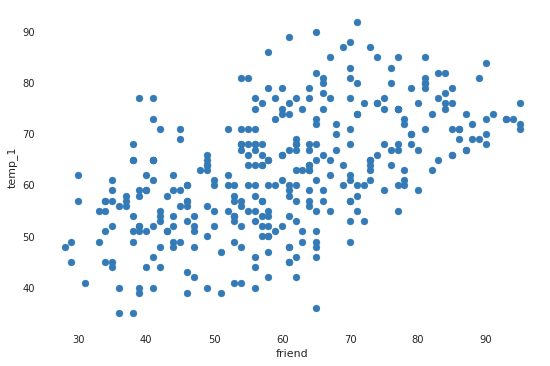

In [ ]:
#生出profile報表，可看出每個特徵值的分佈和彼此相關性
profile = ProfileReport(features, title="Pandas Profiling Report")
profile.to_widgets()

In [ ]:
profile.to_file("your_report.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
! ls

drive  sample_data  small_tree.dot  small_tree.png  your_report.html


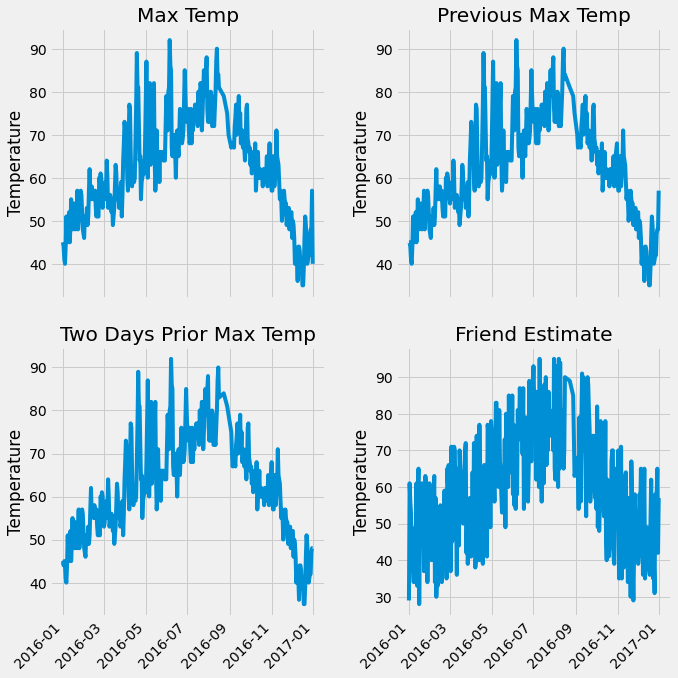

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(10,10))
fig.autofmt_xdate(rotation=45)

ax1.plot(dates,features['actual'])
ax1.set_xlabel('');ax1.set_ylabel('Temperature');ax1.set_title('Max Temp')
ax2.plot(dates,features['temp_1'])
ax2.set_xlabel('');ax2.set_ylabel('Temperature');ax2.set_title('Previous Max Temp')
ax3.plot(dates,features['temp_2'])
ax3.set_xlabel('');ax3.set_ylabel('Temperature');ax3.set_title('Two Days Prior Max Temp')
ax4.plot(dates,features['friend'])
ax4.set_xlabel('');ax4.set_ylabel('Temperature');ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

#由此看這4個欄位,其走勢大致相同

# one-hot encodeing,Frequency Encoding,LabelEncoder 擇一使用
one-hot encodeing 會增加維度，增加誤差,
若改用Frequency Encoding(value counts)，其MAPE降低,準確度提升

另有Target Encoding,可參考
https://axk51013.medium.com/%E4%B8%8D%E8%A6%81%E5%86%8D%E5%81%9Aone-hot-encoding-b5126d3f8a63

In [ ]:
#Frequency Encoding
print(features['weekday'].value_counts())
weeknum = {'Tues':52,'Fri':50,'Sat':50,'Sun':49,'Mon':49,'Wed':49,'Thurs':49}
features['weekday']=features['weekday'].map(weeknum)

Tues     52
Fri      50
Sat      50
Sun      49
Mon      49
Wed      49
Thurs    49
Name: weekday, dtype: int64


In [ ]:
#one-hot-encoding
features=pd.get_dummies(features)
features.head()

,year,month,day,temp_2,temp_1,average,actual,friend,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed
0,2016,1,1,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,41,0,0,0,0,0,1,0


In [ ]:
# LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
test=le.fit_transform(features.weekday)
test

array([0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5,
       6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 5, 3, 5, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,

In [ ]:
print(le.classes_)
test3={index:label for index, label in enumerate(le.classes_)}
test3

# 資料取log使其較接近常態分佈

In [ ]:
#日期備份,之後取log後，跑圖片需要
features2=pd.DataFrame()
features2['year2']=features['year']
features2['month2']=features['month']
features2['day2']=features['day']

features=np.log(0.2+features)
features.head()


,year,month,day,weekday,temp_2,temp_1,average,actual,friend
0,7.60897,0.182322,0.182322,3.916015,3.811097,3.811097,3.824284,3.811097,3.374169
1,7.60897,0.182322,0.788457,3.916015,3.788725,3.811097,3.826465,3.788725,4.114147
2,7.60897,0.182322,1.163151,3.895894,3.811097,3.788725,3.828641,3.718438,4.028917
3,7.60897,0.182322,1.435085,3.895894,3.788725,3.718438,3.830813,3.693867,3.974058
4,7.60897,0.182322,1.648659,3.955082,3.718438,3.693867,3.832980,3.788725,3.718438


In [ ]:
features2.head()

,year2,month2,day2
0,2016,1,1
1,2016,1,2
2,2016,1,3
3,2016,1,4
4,2016,1,5


In [ ]:
features=pd.concat([features,features2],axis=1, ignore_index=False)
features.head()

,year,month,day,weekday,temp_2,temp_1,average,actual,friend,year2,month2,day2
0,7.60897,0.182322,0.182322,3.916015,3.811097,3.811097,3.824284,3.811097,3.374169,2016,1,1
1,7.60897,0.182322,0.788457,3.916015,3.788725,3.811097,3.826465,3.788725,4.114147,2016,1,2
2,7.60897,0.182322,1.163151,3.895894,3.811097,3.788725,3.828641,3.718438,4.028917,2016,1,3
3,7.60897,0.182322,1.435085,3.895894,3.788725,3.718438,3.830813,3.693867,3.974058,2016,1,4
4,7.60897,0.182322,1.648659,3.955082,3.718438,3.693867,3.832980,3.788725,3.718438,2016,1,5


# 機器學習

In [ ]:
labels=features['actual']
features=features.drop('actual',axis=1)
feature_list=list(features.columns)

In [ ]:
feature_list.remove('year2')
feature_list.remove('month2')
feature_list.remove('day2')


In [ ]:
from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels=train_test_split(features,labels,test_size=0.25,random_state=42)

train_features2=train_features[['year2','month2','day2']]
train_features=train_features.drop(['year2','month2','day2'],axis=1)

test_features2=test_features[['year2','month2','day2']]
test_features=test_features.drop(['year2','month2','day2'],axis=1)

print('訓練集特徵',train_features.shape)
print('訓練集標籤',train_labels.shape)
print('測試集特徵',test_features.shape)
print('測試集標籤',test_labels.shape)

訓練集特徵 (261, 8)
訓練集標籤 (261,)
測試集特徵 (87, 8)
測試集標籤 (87,)


In [ ]:
train_features

,year,month,day,weekday,temp_2,temp_1,average,friend
245,7.60897,2.219203,2.954910,3.895894,4.222445,4.237001,4.247066,4.479607
101,7.60897,1.435085,2.653242,3.895894,4.097672,4.080922,4.065602,4.192680
208,7.60897,1.974081,3.407842,3.916015,4.445001,4.479607,4.350278,4.251348
132,7.60897,1.648659,2.721295,3.895894,4.409155,4.177459,4.172848,4.063885
17,7.60897,0.182322,2.901422,3.895894,3.992681,3.916015,3.864931,4.063885
...,...,...,...,...,...,...,...,...
188,7.60897,1.974081,2.322388,3.895894,4.306764,4.265493,4.321480,4.555980
71,7.60897,1.163151,2.721295,3.955082,3.992681,3.895894,3.985273,4.251348
106,7.60897,1.435085,2.954910,3.955082,4.346399,4.490881,4.080922,4.114147
270,7.60897,2.322388,2.653242,3.916015,4.192680,4.097672,4.100989,4.359270


In [ ]:
test_features

,year,month,day,weekday,temp_2,temp_1,average,actual,friend
255,7.60897,2.219203,3.374169,3.895894,4.237001,4.222445,4.194190,4.192680,4.046554
114,7.60897,1.435085,3.303217,3.895894,4.080922,4.097672,4.109233,4.114147,3.916015
314,7.60897,2.415914,3.339322,3.895894,3.974058,3.875359,3.875359,3.955082,3.788725
268,7.60897,2.322388,2.501436,3.895894,4.097672,4.130355,4.114147,4.192680,3.955082
167,7.60897,1.824549,2.954910,3.895894,4.207673,4.177459,4.257030,4.251348,4.063885
...,...,...,...,...,...,...,...,...,...
152,7.60897,1.824549,1.435085,3.916015,4.265493,4.384524,4.220977,4.396915,4.333361
165,7.60897,1.824549,2.844909,3.916015,4.207673,4.265493,4.251348,4.207673,3.992681
261,7.60897,2.322388,1.648659,3.895894,4.114147,4.146304,4.157319,4.192680,3.875359
60,7.60897,1.163151,1.435085,3.916015,4.010963,4.080922,3.953165,4.046554,3.811097


## 隨機森林

### 先不設定深度,跑模型

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000,random_state=42)
rf.fit(train_features,train_labels)
predictions=rf.predict(test_features)
errors=abs(predictions-test_labels)
mape=100*(errors/test_labels)

print('Mean Absoulte Error:',round(np.mean(errors),2),'degress.')
mape=np.mean(100*(errors/test_labels))
print('MAPE:',mape)
accuracy=100-np.mean(mape)
print('Accuracy:',accuracy)

Mean Absoulte Error: 0.06 degress.
MAPE: 1.4723833941801414
Accuracy: 98.52761660581986


In [ ]:
# graphviz is installed already, but need lib too
!apt install libgraphviz-dev #樹模型視覺化用
!pip install pygraphviz
!pip install pydot
!pip install pydotplus

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
# 導入所需工具包
from sklearn.tree import export_graphviz
import pydot #pip install pydot

# 拿到其中的一棵樹
tree = rf.estimators_[5]

# 導出成dot文件
export_graphviz(tree, out_file = 'dot_data', feature_names = feature_list, rounded = True, precision = 1)

# 繪圖
(graph, )= pydot.graph_from_dot_file('dot_data')  

# 展示
graph.write_png('tree.png'); 


In [ ]:
# 得到特征重要性
importances = list(rf.feature_importances_)

# 轉換格式
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# 排序
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# 對應進行打印
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: temp_1               Importance: 0.65
Variable: average              Importance: 0.25
Variable: temp_2               Importance: 0.04
Variable: day                  Importance: 0.03
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: weekday              Importance: 0.01
Variable: year                 Importance: 0.0


[None, None, None, None, None, None, None, None]

In [ ]:
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 13


Text(0.5, 1.0, 'Variable Importances')

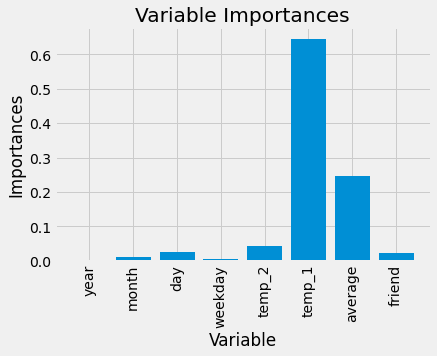

In [ ]:
#圖示特徵重要程度
x_values =list(range(len(importances)))
plt.bar(x_values,importances,orientation='vertical')
plt.xticks(x_values,feature_list,rotation='vertical')
plt.ylabel('Importances');plt.xlabel('Variable');plt.title('Variable Importances')

### 剪枝限制深度為3,再跑一次

In [ ]:
rf_small= RandomForestRegressor(n_estimators=10,max_depth=3,random_state=42)
rf_small.fit(train_features,train_labels)

predictions=rf_small.predict(test_features)
errors=abs(predictions-test_labels)
mape=100*(errors/test_labels)

print('Mean Absoulte Error:',round(np.mean(errors),2),'degress.')
mape=np.mean(100*(errors/test_labels))
print('MAPE:',mape)


Mean Absoulte Error: 0.06 degress.
MAPE: 1.5071419381158935


In [ ]:
#取其中一個樹
tree_small=rf_small.estimators_[5]

# 導出成dot文件
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# 繪圖
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

# 展示
graph.write_png('small_tree.png');

### 只取最重要的二個特徵跑模型

In [ ]:
rf_most_important =RandomForestRegressor(n_estimators=1000,random_state=42)
train_important=train_features[['temp_1','average']]
test_important=test_features[['temp_1','average']]
rf_most_important.fit(train_important,train_labels)
predictions=rf_most_important.predict(test_important)
errors = abs(predictions-test_labels)
print('Mean Absoulte Error:',round(np.mean(errors),2),'degress.')
mape=np.mean(100*(errors/test_labels))
print('MAPE:',mape)

#取最重要的二個特徵跑模型，與之前相比,誤差增加;
#若誤差值在允許範圍內,考量到時間因素,可斟酌採用。

Mean Absoulte Error: 0.06 degress.
MAPE: 1.5294452094236342


## 圖示誤差與實際值

In [ ]:
test_features

,year,month,day,weekday,temp_2,temp_1,average,friend
255,7.60897,2.219203,3.374169,3.895894,4.237001,4.222445,4.194190,4.046554
114,7.60897,1.435085,3.303217,3.895894,4.080922,4.097672,4.109233,3.916015
314,7.60897,2.415914,3.339322,3.895894,3.974058,3.875359,3.875359,3.788725
268,7.60897,2.322388,2.501436,3.895894,4.097672,4.130355,4.114147,3.955082
167,7.60897,1.824549,2.954910,3.895894,4.207673,4.177459,4.257030,4.063885
...,...,...,...,...,...,...,...,...
152,7.60897,1.824549,1.435085,3.916015,4.265493,4.384524,4.220977,4.333361
165,7.60897,1.824549,2.844909,3.916015,4.207673,4.265493,4.251348,3.992681
261,7.60897,2.322388,1.648659,3.895894,4.114147,4.146304,4.157319,3.875359
60,7.60897,1.163151,1.435085,3.916015,4.010963,4.080922,3.953165,3.811097


In [ ]:
# 日期數據
years =features['year2']
months =features['month2']
days  =features['day2']

# 轉換日期格式
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

# 創建一個表格來存日期和其對應的標簽數值
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})

# 同理，再創建一個來存日期和其對應的模型預測值
years = test_features['year2']
months = test_features['month2']
days = test_features['day2']


test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]

test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]

predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})

plt.plot(true_data['date'],true_data['actual'],'b-',label='actual')
plt.plot(predictions_data['date'],predictions_data['prediction'],'ro',label='predction')
plt.xticks(rotation='60')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Maximum Temerature(F)')
plt.title('Acutal and Predicted Values')

print('Mean Absoulte Error:',round(np.mean(errors),2),'degress.')
mape=np.mean(100*(errors/test_labels))
print('MAPE:',mape)

accuracy=100-np.mean(mape)
print('Accuracy:',accuracy)
#由圖看實際值與誤差值誤差不大

KeyError: ignored

# 資料與特徴對結果影響分析

# B.讀入新資料集&EDA

In [ ]:
import pandas
features=pd.read_csv("/content/drive/MyDrive/機器學習人工智慧/第9章：随机森林气温预测/随机森林/随机森林/data/temps_extended.csv")
features.head()

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


In [ ]:
features.shape

(2191, 12)

In [ ]:
#日期處理
import datetime
years= features['year']
months=features['month']
days=features['day']
dates=[str(int(year))+'-'+str(int(month))+'-'+str(int(day)) for year,month,day in zip(years,months,days)]
dates=[datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]
dates[:5]

[datetime.datetime(2011, 1, 1, 0, 0),
 datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 3, 0, 0),
 datetime.datetime(2011, 1, 4, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0)]

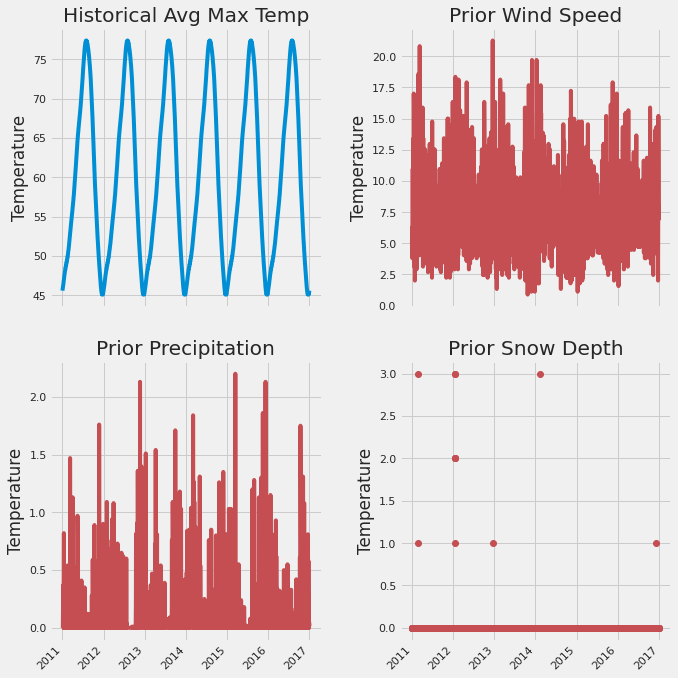

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(10,10))
fig.autofmt_xdate(rotation=45)



ax1.plot(dates,features['average'])
ax1.set_xlabel('');ax1.set_ylabel('Temperature');ax1.set_title('Historical Avg Max Temp')
ax2.plot(dates,features['ws_1'],'r-')
ax2.set_xlabel('');ax2.set_ylabel('Temperature');ax2.set_title('Prior Wind Speed')
ax3.plot(dates,features['prcp_1'],'r-')
ax3.set_xlabel('');ax3.set_ylabel('Temperature');ax3.set_title('Prior Precipitation')
ax4.plot(dates,features['snwd_1'],'ro')
ax4.set_xlabel('');ax4.set_ylabel('Temperature');ax4.set_title('Prior Snow Depth')

plt.tight_layout(pad=2)

#由此看這4個欄位,其走勢大致相同

In [ ]:
seasons=[]
for month in features['month']:
    if month in [1,2,12]:
        seasons.append('winter')
    elif month in [3,4,5]:
        seasons.append('spring')
    elif month in [6,7,8]:
        seasons.append('summer')
    elif month in [9,10,11]:
        seasons.append('fall')

reduced_features=features[['temp_1','prcp_1','average','actual']]
reduced_features['season']=seasons

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
reduced_features.head()

,temp_1,prcp_1,average,actual,season
0,37,0.00,45.6,40,winter
1,40,0.00,45.7,39,winter
2,39,0.00,45.8,42,winter
3,42,0.00,45.9,38,winter
4,38,0.03,46.0,45,winter


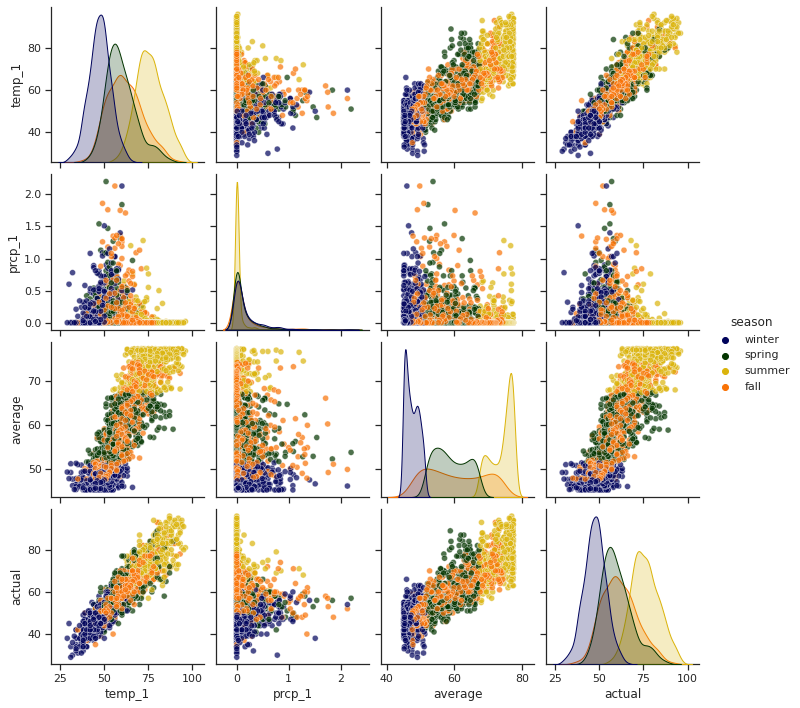

In [ ]:
from seaborn import palettes
import seaborn as sns
sns.set(style='ticks',color_codes=True)
palette=sns.xkcd_palette(['dark blue','dark green','gold','orange'])
sns.pairplot(reduced_features,hue='season',diag_kind='kde',palette=palette,plot_kws=dict(alpha=0.7),diag_kws=dict(shade=True))
#可以看出temp_1和acutal有很強的相關性

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     2191 non-null   int64  
 1   month    2191 non-null   int64  
 2   day      2191 non-null   int64  
 3   weekday  2191 non-null   object 
 4   ws_1     2191 non-null   float64
 5   prcp_1   2191 non-null   float64
 6   snwd_1   2191 non-null   int64  
 7   temp_2   2191 non-null   int64  
 8   temp_1   2191 non-null   int64  
 9   average  2191 non-null   float64
 10  actual   2191 non-null   int64  
 11  friend   2191 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 205.5+ KB


In [ ]:
features.weekday.value_counts()

Sat      314
Sun      314
Tues     313
Thurs    313
Fri      313
Mon      312
Wed      312
Name: weekday, dtype: int64

# one-hot encodeing或Frequency Encoding 擇一使用
one-hot encodeing 會增加維度，增加誤差,
若改用Frequency Encoding(value counts)，其MAPE降低,準確度提升

另有Target Encoding,可參考
https://axk51013.medium.com/%E4%B8%8D%E8%A6%81%E5%86%8D%E5%81%9Aone-hot-encoding-b5126d3f8a63

In [ ]:
#Frequency Encoding
print(features['weekday'].value_counts())
weeknum = {'Tues':313,'Fri':313,'Sat':314,'Sun':314,'Mon':312,'Wed':312,'Thurs':313}
features['weekday']=features['weekday'].map(weeknum)

Sat      314
Sun      314
Tues     313
Thurs    313
Fri      313
Mon      312
Wed      312
Name: weekday, dtype: int64


In [ ]:
#one-hot-encoding
features=pd.get_dummies(features)
features.head()

,year,month,day,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend,weekday_Fri,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed
0,2011,1,1,4.92,0.00,0,36,37,45.6,40,40,0,0,1,0,0,0,0
1,2011,1,2,5.37,0.00,0,37,40,45.7,39,50,0,0,0,1,0,0,0
2,2011,1,3,6.26,0.00,0,40,39,45.8,42,42,0,1,0,0,0,0,0
3,2011,1,4,5.59,0.00,0,39,42,45.9,38,59,0,0,0,0,0,1,0
4,2011,1,5,3.80,0.03,0,42,38,46.0,45,39,0,0,0,0,0,0,1


In [ ]:
features.shape

(2191, 12)

# 資料分割

In [ ]:
labels=features['actual']
features=features.drop('actual',axis=1)
feature_list=list(features.columns)

from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels=train_test_split(features,labels,test_size=0.25,random_state=42)
print('訓練集特徵',train_features.shape)
print('訓練集標籤',train_labels.shape)
print('測試集特徵',test_features.shape)
print('測試集標籤',test_labels.shape)

訓練集特徵 (261, 8)
訓練集標籤 (261,)
測試集特徵 (87, 8)
測試集標籤 (87,)


# 機器學習(增加資料)

## 隨機森林--使用全部資料

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 100, random_state=0)
rf.fit(train_features, train_labels)

predictions=rf.predict(test_features)
errors=abs(predictions-test_labels)
mape=100*(errors/test_labels)
accuracy=100-np.mean(mape)
print('Mean Absoulte Error:',round(np.mean(errors),2),'degress.')
mape=np.mean(100*(errors/test_labels))
print('MAPE:',mape)
accuracy=100-np.mean(mape)
print('Accuracy:',accuracy)

#資料量增加,誤差增加,但可以確保不會過於擬合

ValueError: ignored

## 資料特徵重要程度

In [ ]:
# 得到特征重要性
importances = list(rf.feature_importances_)

# 轉換格式
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# 排序
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# 對應進行打印
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: temp_1               Importance: 0.83
Variable: average              Importance: 0.06
Variable: day                  Importance: 0.02
Variable: ws_1                 Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: friend               Importance: 0.02
Variable: year                 Importance: 0.01
Variable: month                Importance: 0.01
Variable: prcp_1               Importance: 0.01
Variable: weekday              Importance: 0.0
Variable: snwd_1               Importance: 0.0


[None, None, None, None, None, None, None, None, None, None, None]

Text(0.5, 1.0, 'Variable Importances')

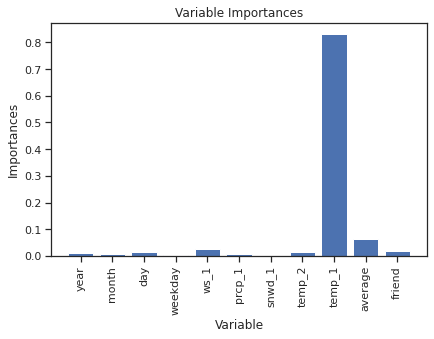

In [ ]:
#圖示特徵重要程度
x_values =list(range(len(importances)))
plt.bar(x_values,importances,orientation='vertical')
plt.xticks(x_values,feature_list,rotation='vertical')
plt.ylabel('Importances');plt.xlabel('Variable');plt.title('Variable Importances')

In [ ]:
# 對特征進行排序
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# 累計重要性
cumulative_importances = np.cumsum(sorted_importances)

# 繪制折線圖
plt.plot(x_values, cumulative_importances, 'g-')

# 畫一條紅色虛線，在0.95那
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# X軸
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Y軸和名字
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

## 隨機森林-只取重要度符合95%的前5個最重要特徵

In [ ]:
from sklearn.ensemble import RandomForestRegressor
important_indices=['temp_1','average','day','ws_1','temp_2']

rf_exp = RandomForestRegressor(n_estimators= 100, random_state=0)
rf_exp.fit(train_features[important_indices], train_labels)

predictions=rf_exp.predict(test_features[important_indices])
errors=abs(predictions-test_labels)
mape=100*(errors/test_labels)
accuracy=100-np.mean(mape)
print('Mean Absoulte Error:',round(np.mean(errors),2),'degress.')
mape=np.mean(100*(errors/test_labels))
print('MAPE:',mape)
accuracy=100-np.mean(mape)
print('Accuracy:',accuracy,'%')

#特徵減少準確率下降

Mean Absoulte Error: 3.93 degress.
MAPE: 6.640324334416641
Accuracy: 93.35967566558335 %


## 時間和準確率相比

In [ ]:

# 重新創建訓練集
important_train_features = train_features[important_indices]
important_test_features = test_features[important_indices]

# 數據維度
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (1643, 5)
Important test features shape: (548, 5)


In [ ]:
s=rf_exp.score(train_features, train_labels)
print('使用所有特征时建模与测试的平均时间消耗:', round(np.mean(all_score), 2), '秒.')

In [ ]:
# 要計算時間了
import time

# 這次是用所有特征
all_features_time = []
all_score_train=[]
all_score_test=[]

# 算一次可能不太準，來10次取個平均
for _ in range(10):
    start_time = time.time()
    rf_exp.fit(train_features, train_labels)
    score_train=rf_exp.score(train_features,train_labels)
    score_test=rf_exp.score(test_features,test_labels)
    all_features_predictions = rf_exp.predict(test_features)
    end_time = time.time()
    all_features_time.append(end_time - start_time)
    all_score_train.append(score_train)
    all_score_test.append(score_test)

all_features_time = np.mean(all_features_time)
all_score_train  =np.mean(all_score_train)
all_score_test  =np.mean(all_score_test)

print('使用所有特征时建模与测试的平均时间消耗:', round(all_features_time, 2), '秒.')
print('訓練集: ',round(all_score_train,2),'準確度')
print('測試集: ',round(all_score_test,2),'準確度')

使用所有特征时建模与测试的平均时间消耗: 0.91 秒.
訓練集:  0.98 準確度
測試集:  0.86 準確度


In [ ]:
# 這次是用部分重要的特征
reduced_features_time = []
reduced_score_train=[]
reduced_score_test=[]
reduced_features_train=train_features[important_indices]
reduced_features_test=test_features[important_indices]


# 算一次可能不太準，來10次取個平均
for _ in range(10):
    start_time = time.time()
    rf_exp.fit(reduced_features_train, train_labels)
    score_train=rf_exp.score(reduced_features_train,train_labels)
    score_test=rf_exp.score(reduced_features_test,test_labels)
    reduced_features_predictions = rf_exp.predict(train_features[important_indices])
    end_time = time.time()
    reduced_features_time.append(end_time - start_time)
    reduced_score_train.append(score_train)
    reduced_score_test.append(score_test)

reduced_features_time = np.mean(reduced_features_time)
reduced_score_train  =np.mean(all_score_train)
reduced_score_test  =np.mean(all_score_test)


print('使用所有特征时建模与测试的平均时间消耗:', round(reduced_features_time, 2), '秒.')
print('訓練集: ',round(reduced_score_train,2),'準確度')
print('測試集: ',round(reduced_score_test,2),'準確度')


使用所有特征时建模与测试的平均时间消耗: 0.67 秒.
訓練集:  0.98 準確度
測試集:  0.86 準確度


In [ ]:
(all_features_time-reduced_features_time)/all_features_time
(all_score_train-reduced_score_train)/all_score_train
(all_score_test-reduced_score_test)/all_score_test

0.0

In [ ]:
# Pandas is used for data manipulation
import pandas as pd

# Read in data as pandas dataframe and display first 5 rows
original_features = pd.read_csv('/content/drive/MyDrive/機器學習人工智慧/第9章：随机森林气温预测/随机森林/随机森林/data/temps.csv')
original_features = pd.get_dummies(original_features)

# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
original_labels = np.array(original_features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
original_features= original_features.drop('actual', axis = 1)

# Saving feature names for later use
original_feature_list = list(original_features.columns)

# Convert to numpy array
original_features = np.array(original_features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
original_train_features, original_test_features, original_train_labels, original_test_labels = train_test_split(original_features, original_labels, test_size = 0.25, random_state = 42)

In [ ]:
import pandas as pd


d = {'model': ['original','exp_all','exp_reduce'], 'error (degrees)': [3.83,3.74,3.93],
     'MAPE':[6.011244187972056,6.281280959541474,6.640324334416641],'accuracy':[93.98875581202795,93.71871904045852,93.35967566558335]}
model_comparison = pd.DataFrame(data=d)


'''
Mean Absoulte Error: 3.83 degress.
MAPE: 6.011244187972056
Accuracy: 93.98875581202795

Mean Absoulte Error: 3.74 degress.
MAPE: 6.281280959541474
Accuracy: 93.71871904045852

Mean Absoulte Error: 3.93 degress.
MAPE: 6.640324334416641
Accuracy: 93.35967566558335 %
'''


'\nMean Absoulte Error: 3.83 degress.\nMAPE: 6.011244187972056\nAccuracy: 93.98875581202795\n\nMean Absoulte Error: 3.74 degress.\nMAPE: 6.281280959541474\nAccuracy: 93.71871904045852\n\nMean Absoulte Error: 3.93 degress.\nMAPE: 6.640324334416641\nAccuracy: 93.35967566558335 %\n'

In [ ]:
model_comparison

,model,error (degrees),MAPE,Accuracy
0,original,3.83,6.011244,93.988756
1,exp_all,3.74,6.281281,93.718719
2,exp_reduce,3.93,6.640324,93.359676


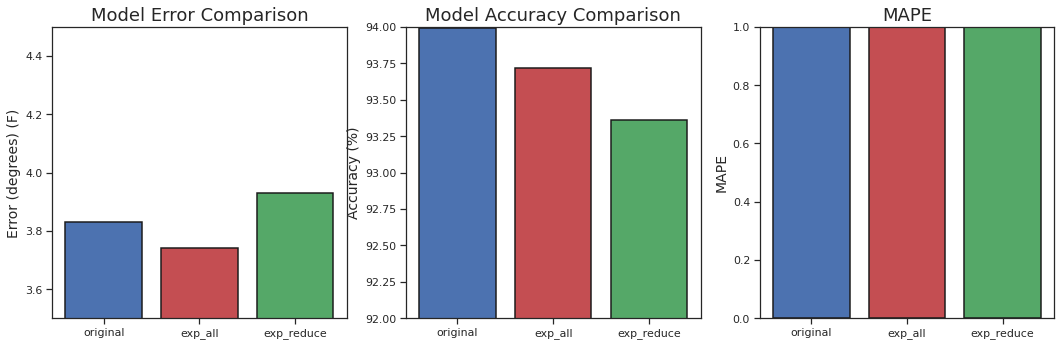

In [ ]:
# 繪圖來總結把
# 設置總體布局，還是一整行看起來好一些
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (16,5), sharex = True)

# X軸
x_values = [0, 1, 2]
labels = list(model_comparison['model'])
plt.xticks(x_values, labels)

# 字體大小
fontdict = {'fontsize': 18}
fontdict_yaxis = {'fontsize': 14}

# 預測溫度和真實溫度差異對比
ax1.bar(x_values, model_comparison['error (degrees)'], color = ['b', 'r', 'g'], edgecolor = 'k', linewidth = 1.5)
ax1.set_ylim(bottom = 3.5, top = 4.5)
ax1.set_ylabel('Error (degrees) (F)', fontdict = fontdict_yaxis); 
ax1.set_title('Model Error Comparison', fontdict= fontdict)

# Accuracy 對比
ax2.bar(x_values, model_comparison['accuracy'], color = ['b', 'r', 'g'], edgecolor = 'k', linewidth = 1.5)
ax2.set_ylim(bottom = 92, top = 94)
ax2.set_ylabel('Accuracy (%)', fontdict = fontdict_yaxis); 
ax2.set_title('Model Accuracy Comparison', fontdict= fontdict)

# MAPE對比
ax3.bar(x_values, model_comparison['MAPE'], color = ['b', 'r', 'g'], edgecolor = 'k', linewidth = 1.5)
ax3.set_ylim(bottom = 0, top = 1)
ax3.set_ylabel('MAPE', fontdict = fontdict_yaxis); 
ax3.set_title('MAPE', fontdict= fontdict);

# 調模型參數

In [ ]:
import pandas as pd
import numpy as np
features=pd.read_csv("/content/drive/MyDrive/機器學習人工智慧/第9章：随机森林气温预测/随机森林/随机森林/data/temps_extended.csv")
features.head()

,year,month,day,weekday,ws_1,prcp_1,snwd_1,temp_2,temp_1,average,actual,friend
0,2011,1,1,Sat,4.92,0.00,0,36,37,45.6,40,40
1,2011,1,2,Sun,5.37,0.00,0,37,40,45.7,39,50
2,2011,1,3,Mon,6.26,0.00,0,40,39,45.8,42,42
3,2011,1,4,Tues,5.59,0.00,0,39,42,45.9,38,59
4,2011,1,5,Wed,3.80,0.03,0,42,38,46.0,45,39


In [ ]:
features = pd.get_dummies(features)

labels = features['actual']
features = features.drop('actual', axis = 1)

feature_list = list(features.columns)

import numpy as np

features = np.array(features)
labels = np.array(labels)

from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels,test_size = 0.25, random_state = 42)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1643, 17)
Training Labels Shape: (1643,)
Testing Features Shape: (548, 17)
Testing Labels Shape: (548,)


In [ ]:
print('{:0.1f} years of data in the training set'.format(train_features.shape[0] / 365.))
print('{:0.1f} years of data in the test set'.format(test_features.shape[0] / 365.))

4.5 years of data in the training set
1.5 years of data in the test set


In [ ]:
important_feature_names = ['temp_1', 'average', 'ws_1', 'temp_2', 'friend', 'year']

important_indices = [feature_list.index(feature) for feature in important_feature_names]

important_train_features = train_features[:, important_indices]
important_test_features = test_features[:, important_indices]

print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (1643, 6)
Important test features shape: (548, 6)


In [ ]:
train_features = important_train_features[:]
test_features = important_test_features[:]

feature_list = important_feature_names[:]

In [ ]:
from pandas.core.common import random_state
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=42)
from pprint import pprint
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# 建立树的个数
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# 最大特征的选择方式
max_features = ['auto', 'sqrt']
# 树的最大深度
max_depth = [int(x) for x in np.linspace(10, 20, num = 2)]
max_depth.append(None)
# 节点最小分裂所需样本个数
min_samples_split = [2, 5, 10]
# 叶子节点最小样本数，任何分裂不能让其子节点样本数少于此值
min_samples_leaf = [1, 2, 4]
# 样本采样方法
bootstrap = [True, False]

# Random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter = 100, scoring='neg_mean_absolute_error', 
              cv = 3, verbose=2, random_state=42, n_jobs=-1)

# 执行寻找操作
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [ ]:
def evaluate(model,test_features,test_labels):
    predictions=model.predict(test_features)
    errors=abs(predictions-test_labels)
    mape=100*np.mean(errors/test_labels)
    accuracy=100-mape
    print('平均氣溫誤差=',np.mean(errors))
    print('Accuracy={:0.2f}%'.format(accuracy))

base_model = RandomForestRegressor( random_state = 42)
base_model.fit(train_features, train_labels)
evaluate(base_model, test_features, test_labels)

平均氣溫誤差= 3.829032846715329
Accuracy=93.56%


In [ ]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=1400)

In [ ]:
best_random = rf_random.best_estimator_
evaluate(best_random, test_features, test_labels)

平均氣溫誤差= 3.717835191894458
Accuracy=93.73%


In [ ]:
from sklearn.model_selection import GridSearchCV

# 网络搜索
param_grid = {
    'bootstrap': [True],
    'max_depth': [8,10,12],
    'max_features': ['auto'],
    'min_samples_leaf': [2,3, 4, 5,6],
    'min_samples_split': [3, 5, 7],
    'n_estimators': [800, 900, 1000, 1200]
}

# 选择基本算法模型
rf = RandomForestRegressor()

# 网络搜索
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring = 'neg_mean_absolute_error', cv = 3, 
                           n_jobs = -1, verbose = 2)


In [ ]:
# 执行搜索
grid_search.fit(train_features, train_labels)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [8, 10, 12],
                         'max_features': ['auto'],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [800, 900, 1000, 1200]},
             scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 3,
 'n_estimators': 800}

In [ ]:
best_grid = grid_search.best_estimator_
evaluate(best_grid, test_features, test_labels)

平均氣溫誤差= 3.6926830888875584
Accuracy=93.76%


In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [12, 15, None],
    'max_features': [3, 4,'auto'],
    'min_samples_leaf': [5, 6, 7],
    'min_samples_split': [7,10,13],
    'n_estimators': [900, 1000, 1200]
}

# 选择算法模型
rf = RandomForestRegressor()

# 继续寻找
grid_search_ad = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring = 'neg_mean_absolute_error', cv = 3, 
                           n_jobs = -1, verbose = 2)

grid_search_ad.fit(train_features, train_labels)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [12, 15, None],
                         'max_features': [3, 4, 'auto'],
                         'min_samples_leaf': [5, 6, 7],
                         'min_samples_split': [7, 10, 13],
                         'n_estimators': [900, 1000, 1200]},
             scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
grid_search_ad.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 4,
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'n_estimators': 900}

In [ ]:
best_grid_ad = grid_search_ad.best_estimator_
evaluate(best_grid_ad, test_features, test_labels)

平均氣溫誤差= 3.652842629230243
Accuracy=93.83%


In [ ]:
print('最终模型参数:\n')
pprint(best_grid_ad.get_params())

最终模型参数:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 15,
 'max_features': 4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 900,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
